In [9]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.art3d import Line3DCollection

Encode a character into a quantum state representation.

This function takes a single character and converts it to a corresponding
angle that will be used for rotation in the quantum circuit.

Args:
    c (str): A single character (e.g., 'A', 'b').

Returns:
    float: An angle in radians, scaled to fit within the range of a qubit state.

In [10]:
def encode_character(c):
    # Calculate the angle based on the ASCII value of the character
    angle = ord(c) * (2 * np.pi / 256)
    return angle  # Angle will be between 0 and 2π

Decode an angle back into a character from its quantum state representation.

This function converts the angle obtained from the quantum measurement back
into a character.

Args:
    angle (float): An angle in radians representing a character's state.

Returns:
    str: The decoded character or '?' if the angle does not correspond to a valid ASCII character.

In [11]:
def decode_character(angle):

    # Convert the angle back to a character code
    char_code = int(np.round(angle * (256 / (2 * np.pi))))
    return chr(char_code) if 0 <= char_code < 256 else '?'  # Ensure character is in valid range

Create a quantum circuit that encodes a word into qubit states.

This function sets up a quantum circuit with one qubit for each character in the input word.
Each character is encoded by applying an RY rotation to its corresponding qubit.

Args:
    word (str): The input word to be encoded, consisting of characters.

Returns:
    Callable: A quantum circuit that, when called, will return the expectation values 
    of each qubit's state after encoding the input word.

In [12]:
def create_embedding_circuit(word):

    # Determine the number of qubits needed (one for each character)
    n_qubits = len(word)
    
    # Initialize a quantum device with 'n_qubits' number of qubits
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev)  # Define a quantum node for executing the circuit
    def circuit():
        # Iterate over each character in the word
        for i, char in enumerate(word):
            angle = encode_character(char)  # Get the angle for the character
            qml.RY(angle, wires=i)  # Apply the rotation to the corresponding qubit
        # Return the expectation values of the Pauli-Z observable for each qubit
        return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

    return circuit  # Return the defined quantum circuit

Encode a word into a quantum circuit and then decode it back to retrieve the original word.

This function integrates the entire workflow: encoding the word into qubit states using
a quantum circuit, measuring the qubits, and then decoding the resulting states back
into characters.

Args:
    word (str): The input word to be encoded.

Returns:
    str: The retrieved word after encoding and decoding process.

In [13]:
def embed_word(word):

    embedding_circuit = create_embedding_circuit(word)  # Create the embedding circuit
    measured_states = embedding_circuit()  # Execute the circuit to get measured states

    # Decode the measured states back into a word
    decoded_word = ''.join(
        decode_character(np.arccos(measured_states[i])) for i in range(len(measured_states))
    )
    
    return decoded_word  # Return the reconstructed word

In [14]:
word = "Bat"  # Input word to encode
retrieved_word = embed_word(word)  # Encode and decode the word
print(f"Original word: {word}")  # Display the original word
print(f"Retrieved word: {retrieved_word}")  # Display the reconstructed word


Original word: Bat
Retrieved word: Bat


In [15]:
# Visualize the encoding process
circuit = create_embedding_circuit(word)
print("Quantum circuit:")
print(qml.draw(circuit)())

Quantum circuit:
0: ──RY(1.62)─┤  <Z>
1: ──RY(2.38)─┤  <Z>
2: ──RY(2.85)─┤  <Z>


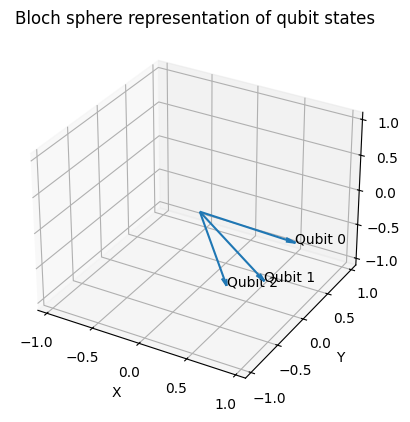

In [16]:
# Visualize the Bloch sphere representation of the qubit states
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(word)):
    angle = encode_character(word[i])
    x = np.sin(angle)
    y = 0
    z = np.cos(angle)
    
    ax.quiver(0, 0, 0, x, y, z, arrow_length_ratio=0.1)
    ax.text(x, y, z, f"Qubit {i}")

ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Bloch sphere representation of qubit states")
plt.show()

In [17]:
# Visualize the measurement and decoding process
embedding_circuit = create_embedding_circuit(word)
measured_states = embedding_circuit()

In [18]:
print("\nMeasured states:")
for i, state in enumerate(measured_states):
    print(f"Qubit {i}: {state:.3f}")
    print(f"Decoded character: {decode_character(np.arccos(state))}")


Measured states:
Qubit 0: -0.049
Decoded character: B
Qubit 1: -0.724
Decoded character: a
Qubit 2: -0.957
Decoded character: t
